# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 07

Group Members:
- Bryan P. Hutagalung (18222130)
- Ardra Rafif Sahasika (18222134)
- Timothy Haposan Simanjuntak (18222137)
- Yusril Fazri Mahendra (18222141)

## Import Libraries

In [105]:
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import re
from itertools import groupby
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from collections import Counter

# Scientific computing
from scipy import stats
from scipy.stats import mode

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Text processing and URL
import re
from itertools import groupby
from urllib.parse import urlparse

# Progress tracking
from tqdm import tqdm

# Type hints (optional)
from typing import List, Dict, Union, Optional

import warnings

warnings.filterwarnings('ignore')

#buat biar seluruh tabel atau output terlihat semua

pd.set_option('display.max_columns', None)

## Import Dataset

In [106]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
pd.set_option('display.max_columns', None)

In [107]:
train.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [108]:
test.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,0.081395,3.0,1.0,NaN,0.0,NaN,6.0,0.316,0.0,0.00,0.0,NaN,NaN,1.0,NaN,1.0,NaN,1864.0,NaN,iaee,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,0.069183,3.0,1.0,0.0,0.0,NaN,NaN,0.409,0.0,0.00,0.0,0.0,0.0,2.0,0.091,0.0,49.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,0.050344,2.0,NaN,0.0,0.0,0.0,11.0,0.440,0.0,0.00,NaN,NaN,0.0,2.0,0.080,NaN,634.0,9381.0,1.0,bistum-hur,0.0,0.0,1.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,0.059065,3.0,1.0,0.0,0.0,0.0,17.0,0.567,NaN,0.00,0.0,0.0,0.0,NaN,NaN,1.0,229.0,711.0,1.0,numberthreebath,100.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,0.035754,NaN,1.0,0.0,0.0,0.0,NaN,0.750,NaN,0.11,0.0,0.0,NaN,NaN,0.060,1.0,88.0,NaN,1.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


## Constants

In [109]:
# Define the target feature
TARGET = 'label'

from typing import List, Dict, Union
import numpy as np
import pandas as pd

def identify_feature_types(df: pd.DataFrame) -> Dict[str, List[str]]:
    """
    Identify and categorize features into numerical, categorical, and boolean types.
    
    Args:
        df (pd.DataFrame): Input dataframe
        
    Returns:
        Dict[str, List[str]]: Dictionary containing:
            - 'numerical': List of numerical feature names
            - 'categorical': List of categorical feature names
            - 'boolean': List of boolean feature names
            
    Example:
        >>> feature_types = identify_feature_types(train_df)
        >>> numerical_features = feature_types['numerical']
        >>> categorical_features = feature_types['categorical']
        >>> boolean_features = feature_types['boolean']
    """
    try:
        # Initial identification of numerical and categorical features
        num_feats = df.select_dtypes(include=[np.number]).columns.tolist()
        cat_feats = df.select_dtypes(exclude=[np.number]).columns.tolist()
        
        # Identify boolean features
        bool_feats = []
        for col in num_feats:
            unique_vals = set(df[col].dropna().unique())
            if unique_vals.issubset({0, 1, 0.0, 1.0, True, False}) and 'NoOf' not in col:
                bool_feats.append(col)
        
        # Update numerical and categorical features
        num_feats = [col for col in num_feats if col not in bool_feats]
        cat_feats = cat_feats + bool_feats
        
        # Convert categorical features to category dtype
        df[cat_feats] = df[cat_feats].astype('category')
        
        return {
            'numerical': num_feats,
            'categorical': cat_feats,
            'boolean': bool_feats
        }
        
    except Exception as e:
        print(f"Error identifying feature types: {str(e)}")
        return {
            'numerical': [],
            'categorical': [],
            'boolean': []
        }

# Get feature types
feature_types = identify_feature_types(train)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

# Define theme and color map
THEME = 'orangered'
CMAP_COLOUR = LinearSegmentedColormap.from_list(THEME, ['#FFECEC', THEME])

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [110]:
train_dev, test_set = train_test_split(train, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_dev, test_size=0.25, random_state=42)

y_train_set = train_set[TARGET]
X_train_set = train_set.drop(columns=TARGET)

y_val_set = val_set[TARGET]
X_val_set = val_set.drop(columns=TARGET)

y_test_set = test_set[TARGET]
X_test_set = test_set.drop(columns=TARGET)

train_dev, test_set = train_test_split(train, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_dev, test_size=0.25, random_state=42)

# Get feature types
feature_types = identify_feature_types(train)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

In [111]:
train_set.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
122689,206014,66721.txt,https://www.visitdallas.com,NaN,NaN,19.0,0.0,com,NaN,0.522907,0.058301,NaN,NaN,0.0,NaN,0.0,13.0,0.500,NaN,0.0,NaN,0.0,0.0,1.0,NaN,1.0,3975.0,61394.0,1.0,visitdallas,NaN,100.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,1.0,36.0,NaN,8.0,123.0,NaN,138.0,1
47918,80162,NaN,NaN,NaN,www.everydayann.com,NaN,0.0,NaN,NaN,0.522907,0.058676,NaN,NaN,NaN,0.0,0.0,13.0,0.500,0.0,NaN,NaN,0.0,0.0,1.0,NaN,1.0,NaN,9587.0,NaN,NaN,NaN,100.0,1.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,1.0,1.0,NaN,0.0,1.0,0.0,NaN,17.0,13.0,17.0,60.0,0.0,NaN,1
5961,9970,20200.txt,https://www.zippyshare.com,NaN,www.zippyshare.com,18.0,NaN,com,NaN,0.522907,0.051626,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,100.0,100.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,28.0,22.0,NaN,NaN,3.0,1
55357,92544,NaN,NaN,NaN,NaN,NaN,0.0,com,1.0,0.522907,NaN,NaN,NaN,0.0,NaN,NaN,9.0,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1.0,1.0,0.0,1.0,39.0,2.0,12.0,51.0,1.0,6.0,1
28327,47379,732535.txt,https://www.americanrootsuk.com,NaN,NaN,23.0,NaN,NaN,NaN,0.522907,NaN,NaN,1.0,NaN,NaN,0.0,17.0,0.567,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14435.0,1335.0,NaN,americanrootsuk,100.0,100.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,3.0,NaN,1.0,NaN,1.0,0.0,NaN,NaN,NaN,0.0,NaN,4.0,8.0,1034.0,0.0,1.0,1


In [112]:
val_set.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
69198,115699,mw29719.txt,NaN,31.0,www.atomzlogs.com.xsph.ru,NaN,0.0,ru,0.555556,0.018013,0.055402,2.0,3.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.097,0.0,9.0,44.0,NaN,atomzlogscomxsph,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0
122213,205234,NaN,https://www.chickychickyblingbling.com,37.0,www.chickychickyblingbling.com,NaN,0.0,com,NaN,0.522907,NaN,NaN,1.0,NaN,NaN,NaN,24.0,0.649,NaN,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,chickychickyblingbling,NaN,100.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1
118277,198698,NaN,NaN,NaN,www.skid.sh,11.0,0.0,sh,NaN,0.000303,0.040745,2.0,1.0,0.0,0.0,NaN,6.0,0.333,0.0,NaN,NaN,0.0,0.0,1.0,0.056,NaN,2.0,27.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0
40210,67197,NaN,https://www.timecamp.com,NaN,www.timecamp.com,16.0,0.0,com,NaN,0.522907,0.068583,3.0,1.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.043,NaN,1920.0,NaN,1.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,1.0,NaN,1.0,NaN,9.0,12.0,NaN,0.0,53.0,1
53462,89376,226129.txt,https://www.shakespeares-sonnets.com,35.0,NaN,NaN,0.0,NaN,0.650000,0.522907,0.065427,NaN,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.057,1.0,NaN,477.0,1.0,NaN,100.0,100.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,3.0,NaN,NaN,310.0,NaN,NaN,1


In [113]:
test_set.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
8409,14051,819722.txt,https://www.citroencarclub.org.uk,NaN,NaN,25.0,0.0,uk,NaN,0.028555,0.061899,2.0,NaN,0.0,0.0,NaN,18.0,0.562,NaN,0.0,0.0,0.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,citroencarclborg,NaN,NaN,1.0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,20.0,27.0,2.0,14.0,NaN,1
20959,34872,NaN,https://www.flipyourtext.com,NaN,www.flipyourtext.com,NaN,0.0,com,NaN,0.522907,NaN,3.0,1.0,0.0,0.0,NaN,NaN,0.519,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,144.0,717.0,NaN,flipyourtext,100.0,100.0,1.0,0.0,1.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,2.0,NaN,9.0,8.0,0.0,NaN,1
88797,148915,254644.txt,NaN,25.0,NaN,18.0,0.0,NaN,NaN,0.522907,NaN,3.0,1.0,0.0,NaN,NaN,12.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.040,1.0,NaN,152070.0,NaN,trustytaxi,100.0,NaN,1.0,NaN,1.0,NaN,NaN,0.0,0.0,2.0,0.0,1.0,NaN,NaN,0.0,NaN,1.0,NaN,1.0,3.0,3.0,NaN,2.0,NaN,2.0,1
24345,40612,NaN,https://www.elcalafate.gov.ar,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0.062508,2.0,NaN,0.0,0.0,0.0,14.0,NaN,NaN,0.0,NaN,NaN,0.0,2.0,0.071,1.0,723.0,NaN,NaN,elclftegov,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,40.0,82.0,2.0,NaN,1
95019,159405,NaN,https://www.dongwon.com,22.0,NaN,NaN,0.0,NaN,1.0,0.522907,0.062712,3.0,1.0,NaN,NaN,0.0,NaN,0.409,0.0,0.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,12.0,9.0,63.0,NaN,NaN,1


In [114]:
train_set.shape, val_set.shape, test_set.shape

((84242, 56), (28081, 56), (28081, 56))

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

#### 1. Data Imputation

In [115]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class BasicImputationHandler(BaseEstimator, TransformerMixin):
    def __init__(self, num_feats, cat_feats, method='mean'):
        """
        Basic imputation using mean/median/mode
        method: 'mean', 'median', 'mode'
        """
        self.num_feats = num_feats
        self.cat_feats = cat_feats
        self.method = method
        self.fill_values = {}

    def fit(self, X, y=None):
        for column in X.columns:
            if column in self.cat_feats:
                self.fill_values[column] = X[column].mode().iloc[0]
            elif column in self.num_feats:
                if self.method == 'mean':
                    self.fill_values[column] = X[column].mean()
                elif self.method == 'median':
                    self.fill_values[column] = X[column].median()
        return self

    def transform(self, X):
        X = X.copy()
        for column, value in self.fill_values.items():
            X[column] = X[column].fillna(value)
        return X

#### 2. Deletion of Missing Data

In [116]:
class DeletionHandler(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.5, method='listwise'):
        """
        Missing data deletion
        method: 'listwise', 'columnwise'
        threshold: for columnwise deletion
        """
        self.threshold = threshold
        self.method = method
        self.cols_to_drop = None

    def fit(self, X, y=None):
        if self.method == 'columnwise':
            missing_ratio = X.isnull().mean()
            self.cols_to_drop = missing_ratio[missing_ratio > self.threshold].index
        return self

    def transform(self, X):
        X = X.copy()
        if self.method == 'listwise':
            return X.dropna()
        elif self.method == 'columnwise':
            return X.drop(columns=self.cols_to_drop)

#### 3. Domain-Specific Strategies

In [117]:
class DomainHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='url'):
        """
        Domain-specific handling
        method: 'url', 'boolean', 'ratio'
        """
        self.method = method
        self.patterns = {
            'url': {'URL': 'https://example.com', 'Domain': 'example.com'},
            'boolean': {'IsHTTPS': 0, 'HasObfuscation': 0},
            'ratio': {'LetterRatioInURL': 0.0, 'DigitRatioInURL': 0.0}
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, value in self.patterns[self.method].items():
            if col in X.columns:
                X[col] = X[col].fillna(value)
        return X

#### 4. Imputation Libraries

In [118]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class AdvancedImputationHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='knn', n_neighbors=5):
        """
        Advanced imputation methods
        method: 'knn', 'iterative', 'matrix'
        """
        self.method = method
        self.n_neighbors = n_neighbors
        if method == 'knn':
            self.imputer = KNNImputer(n_neighbors=n_neighbors)
        elif method == 'iterative':
            self.imputer = IterativeImputer()
        else:
            self.imputer = SimpleImputer(strategy='mean')

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        return pd.DataFrame(
            self.imputer.transform(X),
            columns=X.columns,
            index=X.index
        )

#### Compile

In [119]:
missing_imputation = BasicImputationHandler(
    num_feats=NUM_FEATS,
    cat_feats=CAT_FEATS,
    method='mean'
)

missing_deletion = DeletionHandler(
    method='listwise'
)

missing_domain = DomainHandler(
    method='url_based'
)

missing_advanced = AdvancedImputationHandler(
    method='knn'
)

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

#### 1. Imputation

In [120]:
class ImputationOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, num_feats, method='median', threshold=1.5):
        """
        Handle outliers by imputing with mean/median/mode
        method: 'mean', 'median', 'mode'
        threshold: IQR multiplier for outlier detection
        """
        self.num_feats = num_feats
        self.method = method
        self.threshold = threshold
        self.replacement_values = {}

    def fit(self, X, y=None):
        for col in self.num_feats:
            if self.method == 'median':
                self.replacement_values[col] = X[col].median()
            elif self.method == 'mean':
                self.replacement_values[col] = X[col].mean()
            elif self.method == 'mode':
                self.replacement_values[col] = X[col].mode()[0]
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.num_feats:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Replace outliers with the chosen statistic
            mask = (X[col] < lower_bound) | (X[col] > upper_bound)
            X.loc[mask, col] = self.replacement_values[col]
        return X

#### 2. Clipping

In [121]:
class ClippingOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, num_feats, threshold=1.5):
        """
        Handle outliers by clipping to boundaries
        threshold: IQR multiplier for outlier detection
        """
        self.num_feats = num_feats
        self.threshold = threshold
        self.bounds = {}

    def fit(self, X, y=None):
        for col in self.num_feats:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.bounds[col] = {
                'lower': Q1 - self.threshold * IQR,
                'upper': Q3 + self.threshold * IQR
            }
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.num_feats:
            X[col] = X[col].clip(
                lower=self.bounds[col]['lower'],
                upper=self.bounds[col]['upper']
            )
        return X

#### 3. Transformation

In [122]:
class TransformationOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, num_feats, method='log'):
        """
        Handle outliers using transformations
        method: 'log', 'sqrt', 'box-cox'
        """
        self.num_feats = num_feats
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.num_feats:
            if self.method == 'log':
                # Add small constant to handle zeros
                X[col] = np.log1p(X[col] - X[col].min() + 1)
            elif self.method == 'sqrt':
                X[col] = np.sqrt(X[col] - X[col].min())
            elif self.method == 'box-cox':
                from scipy import stats
                X[col] = stats.boxcox(X[col] - X[col].min() + 1)[0]
        return X

#### 4. Model-Based

In [123]:
from sklearn.ensemble import IsolationForest

class ModelBasedOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, num_feats, contamination=0.1):
        """
        Handle outliers using isolation forest
        contamination: proportion of outliers in the dataset
        """
        self.num_feats = num_feats
        self.contamination = contamination
        self.outlier_detector = IsolationForest(
            contamination=contamination,
            random_state=42
        )

    def fit(self, X, y=None):
        self.outlier_detector.fit(X[self.num_feats])
        return self

    def transform(self, X):
        X = X.copy()
        outlier_labels = self.outlier_detector.predict(X[self.num_feats])
        for col in self.num_feats:
            # Replace outliers with median of non-outlier values
            median_val = X.loc[outlier_labels == 1, col].median()
            X.loc[outlier_labels == -1, col] = median_val
        return X

#### Compile

In [124]:
outlier_imputation = ImputationOutlierHandler(
    num_feats=NUM_FEATS,
    method='median',
    threshold=1.5
)

outlier_clipping = ClippingOutlierHandler(
    num_feats=NUM_FEATS,
    threshold=1.5
)

outlier_transformation = TransformationOutlierHandler(
    num_feats=NUM_FEATS,
    method='log'
)

outlier_model = ModelBasedOutlierHandler(
    num_feats=NUM_FEATS,
    contamination=0.1
)

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [125]:
def handle_duplicates(train_set, val_set, test_set, verbose=True):
    """
    Handle duplicates in datasets with analysis and reporting
    """
    if verbose:
        # Print initial stats
        print("Initial shapes:")
        print(f"Train set: {train_set.shape}")
        print(f"Validation set: {val_set.shape}") 
        print(f"Test set: {test_set.shape}")
        print("\nChecking for duplicates...")
        
        # Analyze duplicates
        train_dups = train_set.duplicated().sum()
        val_dups = val_set.duplicated().sum()
        test_dups = test_set.duplicated().sum()
        
        print(f"\nDuplicates found:")
        print(f"Train set: {train_dups}")
        print(f"Validation set: {val_dups}")
        print(f"Test set: {test_dups}")

    # Remove duplicates while preserving index
    train_set_clean = train_set.drop_duplicates(keep='first')
    val_set_clean = val_set.drop_duplicates(keep='first') 
    test_set_clean = test_set.drop_duplicates(keep='first')

    if verbose:
        # Print final stats
        print("\nFinal shapes after removing duplicates:")
        print(f"Train set: {train_set_clean.shape}")
        print(f"Validation set: {val_set_clean.shape}")
        print(f"Test set: {test_set_clean.shape}")
        
        # Print reduction percentages
        train_reduction = (1 - len(train_set_clean)/len(train_set)) * 100
        val_reduction = (1 - len(val_set_clean)/len(val_set)) * 100
        test_reduction = (1 - len(test_set_clean)/len(test_set)) * 100
        
        print(f"\nReduction percentages:")
        print(f"Train set: {train_reduction:.2f}%")
        print(f"Validation set: {val_reduction:.2f}%") 
        print(f"Test set: {test_reduction:.2f}%")

    return train_set_clean, val_set_clean, test_set_clean

# Use the function
train_set, val_set, test_set = handle_duplicates(train_set, val_set, test_set)

Initial shapes:
Train set: (84242, 56)
Validation set: (28081, 56)
Test set: (28081, 56)

Checking for duplicates...

Duplicates found:
Train set: 0
Validation set: 0
Test set: 0

Final shapes after removing duplicates:
Train set: (84242, 56)
Validation set: (28081, 56)
Test set: (28081, 56)

Reduction percentages:
Train set: 0.00%
Validation set: 0.00%
Test set: 0.00%


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### 1. Feature Selection

In [126]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    """
    Feature selection using multiple methods:
    - Initial column dropping (id, FILENAME, etc.)
    - Correlation-based
    - Mutual information
    - Variance threshold
    """
    def __init__(self, num_feats, cat_feats, method='correlation', threshold=0.1, target_col='label'):
        self.num_feats = num_feats
        self.cat_feats = cat_feats
        self.method = method
        self.threshold = threshold
        self.selected_features = None
        self.target_col = target_col
        # Columns to always drop
        self.drop_columns = ['id', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title']
        
    def fit(self, X, y=None):
        # First drop specified columns
        X_temp = X.copy()
        if y is not None:
            X_temp[self.target_col] = y  # Add target column for correlation
            
        self.columns_to_drop = [col for col in self.drop_columns if col in X_temp.columns]
        X_temp = X_temp.drop(columns=self.columns_to_drop)
        
        if self.method == 'correlation':
            # Calculate correlation matrix
            numeric_cols = X_temp.select_dtypes(include=[np.number]).columns
            corr_matrix = X_temp[numeric_cols].corr()
            
            if self.target_col in corr_matrix.columns:
                # Get correlation with target
                target_corr = abs(corr_matrix[self.target_col])
                # Select features above threshold
                self.selected_features = target_corr[target_corr > self.threshold].index
            else:
                self.selected_features = numeric_cols
        
        elif self.method == 'mutual_info':
            # Use mutual information for feature selection
            selector = SelectKBest(score_func=mutual_info_classif, k=20)
            selector.fit(X_temp[self.num_feats], y)
            self.selected_features = X_temp[self.num_feats].columns[selector.get_support()]
            
        # Update feature lists
        self.num_feats = [col for col in self.num_feats if col not in self.columns_to_drop]
        self.cat_feats = [col for col in self.cat_feats if col not in self.columns_to_drop]
            
        return self
        
    def transform(self, X):
        # First drop specified columns
        X_transformed = X.drop(columns=self.columns_to_drop)
        
        # Then apply feature selection if specified
        if self.selected_features is not None:
            features_to_keep = [col for col in self.selected_features if col != self.target_col]
            X_transformed = X_transformed[features_to_keep]
            
        return X_transformed

#### 2. Creating New Features

In [127]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    """
    Create new features through:
    - Polynomial features
    - Interaction terms
    - Ratios and differences
    """
    def __init__(self, num_feats, degree=2):
        self.num_feats = num_feats
        self.degree = degree
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X = X.copy()
        
        # Polynomial features
        for col in self.num_feats:
            if col in X.columns:
                for d in range(2, self.degree + 1):
                    X[f'{col}_power_{d}'] = X[col] ** d
        
        # Interaction features
        for i, col1 in enumerate(self.num_feats):
            for j, col2 in enumerate(self.num_feats[i+1:], i+1):
                if col1 in X.columns and col2 in X.columns:
                    X[f'{col1}_{col2}_interaction'] = X[col1] * X[col2]
        
        # Ratios
        important_pairs = [
            ('URLLength', 'DomainLength'),
            ('NoOfLettersInURL', 'URLLength'),
            ('NoOfDigitsInURL', 'URLLength')
        ]
        
        for num, denom in important_pairs:
            if num in X.columns and denom in X.columns:
                X[f'{num}_{denom}_ratio'] = X[num] / (X[denom] + 1e-6)
                
        return X

#### 3. Binning or Discretization

In [128]:
class FeatureBinner(BaseEstimator, TransformerMixin):
    """
    Bin continuous features into categories:
    - Equal-width binning
    - Equal-frequency binning
    - Custom binning
    """
    def __init__(self, num_feats, method='equal_width', n_bins=5):
        self.num_feats = num_feats
        self.method = method
        self.n_bins = n_bins
        self.bin_edges = {}
        
    def fit(self, X, y=None):
        for col in self.num_feats:
            if col in X.columns:
                if self.method == 'equal_width':
                    self.bin_edges[col] = np.linspace(
                        X[col].min(), 
                        X[col].max(), 
                        self.n_bins + 1
                    )
                elif self.method == 'equal_freq':
                    self.bin_edges[col] = np.percentile(
                        X[col].dropna(),
                        np.linspace(0, 100, self.n_bins + 1)
                    )
        return self
        
    def transform(self, X):
        X = X.copy()
        for col, edges in self.bin_edges.items():
            if col in X.columns:
                X[f'{col}_binned'] = pd.cut(
                    X[col], 
                    bins=edges, 
                    labels=[f'bin_{i}' for i in range(self.n_bins)]
                )
        return X

#### 4. Domain-Specific

In [129]:
class DomainFeatureCreator(BaseEstimator, TransformerMixin):
    """
    Create domain-specific features for URL analysis:
    - URL structure features
    - Security indicators
    - Pattern matching
    """
    def __init__(self):
        self.suspicious_patterns = [
            r'login', r'admin', r'bank', r'secure',
            r'password', r'verify', r'account'
        ]
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X = X.copy()
        
        # URL structure features
        X['HasSubdomain'] = X['Domain'].apply(
            lambda x: len(str(x).split('.')) > 2 if pd.notnull(x) else False
        )
        X['PathDepth'] = X['URL'].apply(
            lambda x: len(str(x).split('/')) - 3 if pd.notnull(x) else 0
        )
        
        # Security indicators
        X['IsHTTPS'] = X['URL'].apply(
            lambda x: str(x).startswith('https') if pd.notnull(x) else False
        )
        X['HasSSL'] = X['URL'].apply(
            lambda x: 'ssl' in str(x).lower() if pd.notnull(x) else False
        )
        
        # Suspicious patterns
        for pattern in self.suspicious_patterns:
            X[f'Contains_{pattern}'] = X['URL'].apply(
                lambda x: bool(re.search(pattern, str(x), re.I)) if pd.notnull(x) else False
            )
            
        return X

#### Compile

In [130]:
# def merge_and_cluster(X_train, X_test, n_clusters=3, random_state=None):
#     """
#     Merge X_train and X_test, apply K-means clustering, and return train and test sets with cluster labels.

#     Parameters:
#         - X_train: DataFrame containing training data.
#         - X_test: DataFrame containing test data.
#         - n_clusters: Number of clusters for K-means clustering.
#         - random_state: Random seed for reproducibility.

#     Returns:
#         - X_train_clustered: Training data with cluster labels.
#         - X_test_clustered: Test data with cluster labels.
#     """
#     # Merge X_train and X_test
#     combined_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

#     # Apply K-means clustering
#     kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
#     combined_data['cluster_label'] = kmeans.fit_predict(combined_data)

#     # Split the data back into train and test sets with cluster labels
#     X_train_clustered, X_test_clustered = train_test_split(
#         combined_data, test_size=len(X_test), random_state=random_state, shuffle=False
#     )

#     return X_train_clustered, X_test_clustered

In [131]:
# class FeatureCreator(BaseEstimator, TransformerMixin):  
#     def __init__(self, num_feats):  
#         self.num_feats = num_feats

#     def fit(self, X, y=None):  
#         return self  

#     def transform(self, X):  
#         X = X.copy()  

#         # Fill missing Domain with part of URL starting from www  
#         X['Domain'] = X.apply(lambda row: row['URL'].split('//')[-1].split('/')[0] if pd.isnull(row['Domain']) and pd.notnull(row['URL']) else row['Domain'], axis=1)  
#         # Fill missing URL with https:// followed by Domain  
#         X['URL'] = X.apply(lambda row: 'https://' + row['Domain'] if pd.isnull(row['URL']) and pd.notnull(row['Domain']) else row['URL'], axis=1)  

#         # Extract Title from URL  
#         X['Title'] = X['URL'].apply(lambda x: re.search(r'//(www\.)?([^/]+)', str(x)).group(2) if pd.notnull(x) else '')  

#         # Create new features  
#         X['URLLength'] = X['URL'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)  
#         X['DomainLength'] = X['Domain'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)  
#         X['TitleLength'] = X['Title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)  
#         X['TLD'] = X['Domain'].apply(lambda x: x.split('.')[-1] if pd.notnull(x) else '')  
#         X['TLDLength'] = X['TLD'].apply(lambda x: len(x))  
        
#         # Additional features  
#         X['NoOfLettersInURL'] = X['URL'].apply(lambda x: len(re.findall(r'[a-zA-Z]', str(x))) if pd.notnull(x) else 0)  
#         X['NoOfDigitsInURL'] = X['URL'].apply(lambda x: len(re.findall(r'\d', str(x))) if pd.notnull(x) else 0)  
#         X['NoOfEqualsInURL'] = X['URL'].apply(lambda x: str(x).count('=') if pd.notnull(x) else 0)  
#         X['NoOfQMarkInURL'] = X['URL'].apply(lambda x: str(x).count('?') if pd.notnull(x) else 0)  
#         X['NoOfAmpersandInURL'] = X['URL'].apply(lambda x: str(x).count('&') if pd.notnull(x) else 0)  
#         X['NoOfOtherSpecialCharsInURL'] = X['URL'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9=&?]', str(x))) if pd.notnull(x) else 0)  

#         # Ratios  
#         X['LetterRatioInURL'] = X.apply(lambda row: row['NoOfLettersInURL'] / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)  
#         X['SpecialCharRatioInURL'] = X.apply(lambda row: (row['NoOfEqualsInURL'] + row['NoOfQMarkInURL'] + row['NoOfAmpersandInURL'] + row['NoOfOtherSpecialCharsInURL']) / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)  
#         X['DigitRatioInURL'] = X.apply(lambda row: row['NoOfDigitsInURL'] / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)  
#         X['DomainRatioInURL'] = X.apply(lambda row: row['DomainLength'] / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)  
#         X['TLDRatioInURL'] = X.apply(lambda row: row['TLDLength'] / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)  
#         X['IsHTTPS'] = X['URL'].apply(lambda x: 1 if str(x).startswith('https') else 0)  

#         # Matching scores  
#         X['DomainTitleMatchScore'] = X.apply(lambda row: sum(1 for char in str(row['Domain']) if char in str(row['Title'])) / len(str(row['Domain'])) if pd.notnull(row['Domain']) and pd.notnull(row['Title']) and len(row['Domain']) > 0 else 0, axis=1)  
#         X['URLTitleMatchScore'] = X.apply(lambda row: sum(1 for char in str(row['URL']) if char in str(row['Title'])) / len(str(row['URL'])) if pd.notnull(row['URL']) and pd.notnull(row['Title']) and len(row['URL']) > 0 else 0, axis=1)  
#         X['CharContinuationRate'] = X['URL'].apply(lambda x: np.mean([len(list(g)) for k, g in groupby(str(x)) if k.isalpha()]) if pd.notnull(x) else 0)  
#         X['HasObfuscation'] = X['URL'].apply(lambda x: 1 if re.search(r'%[0-9a-fA-F]{2}', str(x)) else 0)  
#         X['NoOfSubDomain'] = X['Domain'].apply(lambda x: len(str(x).split('.')) - 2 if pd.notnull(x) else 0)  
#         X['NoOfObfuscatedChar'] = X['URL'].apply(lambda x: len(re.findall(r'%[0-9a-fA-F]{2}', str(x))) if pd.notnull(x) else 0)  
#         X['ObfuscationCharRatioInURL'] = X.apply(lambda row: row['NoOfObfuscatedChar'] / row['URLLength'] if row['URLLength'] > 0 else 0, axis=1)


#         self.num_feats = X.select_dtypes(include=[np.number]).columns.tolist()
#         return X

In [132]:
# import pandas as pd
# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureDropper(BaseEstimator, TransformerMixin):
#     def __init__(self, num_feats, cat_feats, strong_corr_threshold=0.1, low_corr_threshold=0.05):
#         # Columns to drop based on correlation analysis
#         self.initial_columns_to_drop = [
#             'id', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'
#         ]
#         self.num_feats = num_feats  
#         self.cat_feats = cat_feats  
#         self.strong_corr_threshold = strong_corr_threshold
#         self.low_corr_threshold = low_corr_threshold

#     def fit(self, X, y=None):  
#         return self  
    
#     def transform(self, X):  
#         X = X.copy()

#         # Drop rows where URL, Title, and Domain are all NaN  
#         X = X.dropna(subset=['URL', 'TLD', 'Domain', 'Title', 'URLLength', 'TLDLength', 'DomainLength', 'TitleLength'], how='all')  

#         # Drop initial columns
#         columns_to_drop = [col for col in self.initial_columns_to_drop if col in X.columns]
#         X.drop(columns=columns_to_drop, inplace=True)
        
#         # Calculate the correlation matrix
#         correlation_matrix = X.corr()

#         # Correlation with the target label
#         label_corr = correlation_matrix['label'].drop('label', axis=0)

#         # Classify columns to keep or drop
#         additional_columns_to_drop = label_corr[abs(label_corr) < self.low_corr_threshold].index.tolist()

#         # Drop specified columns  
#         additional_columns_to_drop = [col for col in additional_columns_to_drop if col in X.columns]  
#         X.drop(columns=additional_columns_to_drop, inplace=True)
        
#         # Update num_feats and cat_feats
#         self.num_feats = [col for col in self.num_feats if col not in additional_columns_to_drop]  
#         self.cat_feats = [col for col in self.cat_feats if col not in additional_columns_to_drop] 

#         print(additional_columns_to_drop)

#         return X

In [133]:
# import numpy as np
# import pandas as pd
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# import re
# from itertools import groupby
# from urllib.parse import urlparse

# class AdvancedFeatureEngineering(BaseEstimator, TransformerMixin):
#     """
#     Advanced feature engineering with:
#     1. URL-based features
#     2. Domain-specific features
#     3. Security-related features
#     4. Statistical features
#     5. Interaction features
#     6. Feature selection
#     """
#     def __init__(self, num_feats, cat_feats, n_clusters=3, n_select_features=20):
#         self.num_feats = num_feats
#         self.cat_feats = cat_feats
#         self.n_clusters = n_clusters
#         self.n_select_features = n_select_features
#         self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#         self.scaler = StandardScaler()
#         self.selector = SelectKBest(score_func=mutual_info_classif, k=n_select_features)
        
#     def _create_url_features(self, X):
#         """Create URL-based features"""
#         X = X.copy()
        
#         # Basic URL features
#         X['URLLength'] = X['URL'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
#         X['DomainLength'] = X['Domain'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
#         X['SubdomainCount'] = X['Domain'].apply(lambda x: len(str(x).split('.')) - 1 if pd.notnull(x) else 0)
        
#         # URL component analysis
#         def analyze_url(url):
#             try:
#                 parsed = urlparse(str(url))
#                 return {
#                     'scheme': parsed.scheme,
#                     'path_length': len(parsed.path),
#                     'query_length': len(parsed.query),
#                     'has_params': len(parsed.params) > 0,
#                     'fragment_length': len(parsed.fragment)
#                 }
#             except:
#                 return {'scheme': '', 'path_length': 0, 'query_length': 0, 'has_params': False, 'fragment_length': 0}
        
#         url_components = X['URL'].apply(analyze_url).apply(pd.Series)
#         X = pd.concat([X, url_components], axis=1)
        
#         # Character-based features
#         X['LetterCount'] = X['URL'].apply(lambda x: len(re.findall(r'[a-zA-Z]', str(x))))
#         X['DigitCount'] = X['URL'].apply(lambda x: len(re.findall(r'\d', str(x))))
#         X['SpecialCharCount'] = X['URL'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9]', str(x))))
        
#         return X

#     def _create_security_features(self, X):
#         """Create security-related features"""
#         X = X.copy()
        
#         # SSL/TLS features
#         X['IsHTTPS'] = X['URL'].apply(lambda x: 1 if str(x).startswith('https') else 0)
        
#         # Suspicious patterns
#         suspicious_patterns = [
#             r'login', r'admin', r'bank', r'secure', r'account',
#             r'password', r'credential', r'verify', r'update'
#         ]
        
#         for pattern in suspicious_patterns:
#             col_name = f'Contains_{pattern}'
#             X[col_name] = X['URL'].str.contains(pattern, case=False).astype(int)
        
#         # Entropy-based features
#         def calculate_entropy(text):
#             if not text:
#                 return 0
#             prob = [float(text.count(c)) / len(text) for c in set(text)]
#             return sum([-p * np.log2(p) for p in prob])
            
#         X['URLEntropy'] = X['URL'].apply(lambda x: calculate_entropy(str(x)))
#         X['DomainEntropy'] = X['Domain'].apply(lambda x: calculate_entropy(str(x)))
        
#         return X

#     def _create_statistical_features(self, X):
#         """Create statistical and interaction features"""
#         X = X.copy()
        
#         # Ratios and proportions
#         for col in self.num_feats:
#             if col in X.columns:
#                 # Create normalized versions
#                 X[f'{col}_Normalized'] = self.scaler.fit_transform(X[[col]])
                
#                 # Create polynomial features for important numerical columns
#                 if col in ['URLLength', 'DomainLength', 'TitleLength']:
#                     X[f'{col}_Squared'] = X[col] ** 2
                    
#         # Interaction features
#         important_features = ['URLLength', 'DomainLength', 'TitleLength']
#         for i in range(len(important_features)):
#             for j in range(i+1, len(important_features)):
#                 if important_features[i] in X.columns and important_features[j] in X.columns:
#                     new_col = f'{important_features[i]}_{important_features[j]}_Interaction'
#                     X[new_col] = X[important_features[i]] * X[important_features[j]]
        
#         return X

#     def _select_features(self, X, y=None):
#         """Select most important features"""
#         if y is not None:
#             # Use mutual information for feature selection
#             numeric_cols = X.select_dtypes(include=[np.number]).columns
#             X_numeric = X[numeric_cols]
            
#             self.selector.fit(X_numeric, y)
#             selected_features_mask = self.selector.get_support()
#             selected_features = numeric_cols[selected_features_mask]
            
#             # Keep only selected features and non-numeric columns
#             X = pd.concat([
#                 X[selected_features],
#                 X.select_dtypes(exclude=[np.number])
#             ], axis=1)
        
#         return X

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         # Create new features
#         X = self._create_url_features(X)
#         X = self._create_security_features(X)
#         X = self._create_statistical_features(X)
        
#         # Add clustering
#         if len(X) > 0:
#             numeric_features = X.select_dtypes(include=[np.number]).columns
#             X_scaled = self.scaler.fit_transform(X[numeric_features])
#             X['Cluster'] = self.kmeans.fit_predict(X_scaled)
        
#         # Select best features
#         X = self._select_features(X, y)
        
#         return X

In [134]:
# feature_engineering = AdvancedFeatureEngineering(
#     num_feats=NUM_FEATS,
#     cat_feats=CAT_FEATS,
#     n_clusters=3,
#     n_select_features=20
# )

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [135]:
# class FeatureDowncaster(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):  
#         return self  

#     def transform(self, X, y=None):  
#         X = X.copy()  
#         for col in X.select_dtypes(include=['float64']).columns:  
#             X[col] = pd.to_numeric(X[col], downcast='float')  
#         for col in X.select_dtypes(include=['int64']).columns:  
#             X[col] = pd.to_numeric(X[col], downcast='integer')  
#         return X

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

#### 1. Min-Max Scaling (Normalization)

In [136]:
class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    """
    Min-Max scaling to [0,1] range
    """
    def __init__(self, num_feats, feature_range=(0,1)):
        self.num_feats = num_feats
        self.feature_range = feature_range
        self.scaler = MinMaxScaler(feature_range=feature_range)
        
    def fit(self, X, y=None):
        self.existing_num_feats = [col for col in self.num_feats if col in X.columns]
        if self.existing_num_feats:
            self.scaler.fit(X[self.existing_num_feats])
        return self
        
    def transform(self, X):
        X = X.copy()
        if self.existing_num_feats:
            X[self.existing_num_feats] = self.scaler.transform(X[self.existing_num_feats])
        return X

#### 2. Standardization (Z-Score Scaling)

In [137]:
class StandardScalerTransformer(BaseEstimator, TransformerMixin):
    """
    Standardization (Z-score normalization)
    Scales features to have mean=0 and variance=1
    """
    def __init__(self, num_feats):
        self.num_feats = num_feats
        self.scaler = StandardScaler()
        
    def fit(self, X, y=None):
        # Only process columns that exist and are numerical
        self.existing_num_feats = [col for col in self.num_feats 
                                 if col in X.columns and X[col].dtype.kind in 'biufc']
        if self.existing_num_feats:
            self.scaler.fit(X[self.existing_num_feats])
        return self
        
    def transform(self, X):
        X = X.copy()
        if self.existing_num_feats:
            # Convert to numpy array for faster processing
            data = X[self.existing_num_feats].values
            X[self.existing_num_feats] = self.scaler.transform(data)
        return X

#### 3. Robust Scaling

In [138]:
class RobustScalerTransformer(BaseEstimator, TransformerMixin):
    """
    Robust scaling using statistics that are robust to outliers
    """
    def __init__(self, num_feats):
        self.num_feats = num_feats
        self.scaler = RobustScaler()
        
    def fit(self, X, y=None):
        self.existing_num_feats = [col for col in self.num_feats if col in X.columns]
        if self.existing_num_feats:
            self.scaler.fit(X[self.existing_num_feats])
        return self
        
    def transform(self, X):
        X = X.copy()
        if self.existing_num_feats:
            X[self.existing_num_feats] = self.scaler.transform(X[self.existing_num_feats])
        return X

#### 4. Log Transformation

In [139]:
class LogScalerTransformer(BaseEstimator, TransformerMixin):
    """
    Log transformation for handling skewed distributions
    """
    def __init__(self, num_feats):
        self.num_feats = num_feats
        
    def fit(self, X, y=None):
        self.existing_num_feats = [col for col in self.num_feats if col in X.columns]
        return self
        
    def transform(self, X):
        X = X.copy()
        if self.existing_num_feats:
            for col in self.existing_num_feats:
                # Add small constant to handle zeros
                X[col] = np.log1p(X[col] - X[col].min() + 1)
        return X

#### Compile

In [140]:
scaler_standard = StandardScalerTransformer(
    num_feats=NUM_FEATS
)

scaler_minmax = MinMaxScalerTransformer(
    num_feats=NUM_FEATS,
    feature_range=(0,1)
)

scaler_robust = RobustScalerTransformer(
    num_feats=NUM_FEATS
)

scaler_log = LogScalerTransformer(
    num_feats=NUM_FEATS
)

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

#### 1. Label Encoding

In [141]:
class LabelEncodingTransformer(BaseEstimator, TransformerMixin):
    """
    Label encoding: Convert categories to integer labels
    Suitable for ordinal data
    """
    def __init__(self, cat_feats):
        self.cat_feats = cat_feats
        self.label_maps = {}
        
    def fit(self, X, y=None):
        # Create mapping for each categorical feature
        for col in self.cat_feats:
            if col in X.columns:
                unique_values = X[col].unique()
                self.label_maps[col] = {val: idx for idx, val in enumerate(unique_values)}
        return self
        
    def transform(self, X):
        X = X.copy()
        for col, mapping in self.label_maps.items():
            if col in X.columns:
                X[col] = X[col].map(mapping)
        return X

#### 2. One-Hot Encoding

In [142]:
class OneHotEncodingTransformer(BaseEstimator, TransformerMixin):
    """
    One-hot encoding: Create binary columns for each category
    Suitable for nominal data
    """
    def __init__(self, cat_feats):
        self.cat_feats = cat_feats
        self.dummy_columns = {}
        
    def fit(self, X, y=None):
        # Only process categorical columns that exist
        self.existing_cat_feats = [col for col in self.cat_feats if col in X.columns]
        for col in self.existing_cat_feats:
            unique_vals = X[col].unique()
            self.dummy_columns[col] = [f"{col}_{val}" for val in unique_vals]
        return self
        
    def transform(self, X):
        X = X.copy()
        for col in self.existing_cat_feats:
            # Use pandas get_dummies for efficiency
            dummies = pd.get_dummies(X[col], prefix=col, sparse=True)
            # Add missing columns
            for dummy_col in self.dummy_columns[col]:
                if dummy_col not in dummies.columns:
                    dummies[dummy_col] = 0
            X = pd.concat([X, dummies[self.dummy_columns[col]]], axis=1)
            X.drop(col, axis=1, inplace=True)
        return X

#### 3. Target Encoding

In [143]:
class TargetEncodingTransformer(BaseEstimator, TransformerMixin):
    """
    Target encoding: Replace categories with target mean
    Suitable for high cardinality categorical features
    """
    def __init__(self, cat_feats, smoothing=10):
        self.cat_feats = cat_feats
        self.smoothing = smoothing
        self.target_means = {}
        self.global_means = {}
        
    def fit(self, X, y):
        # Calculate global mean for each feature
        for col in self.cat_feats:
            if col in X.columns:
                self.global_means[col] = y.mean()
                
                # Calculate means per category with smoothing
                category_means = {}
                category_counts = X[col].value_counts()
                
                for category in X[col].unique():
                    category_mask = X[col] == category
                    n = category_counts[category]
                    category_mean = y[category_mask].mean()
                    
                    # Apply smoothing
                    smoothed_mean = (n * category_mean + self.smoothing * self.global_means[col]) / (n + self.smoothing)
                    category_means[category] = smoothed_mean
                    
                self.target_means[col] = category_means
        return self
        
    def transform(self, X):
        X = X.copy()
        for col, means in self.target_means.items():
            if col in X.columns:
                # Map values, use global mean for unseen categories
                X[col] = X[col].map(means).fillna(self.global_means[col])
        return X

In [144]:
encoder_label = LabelEncodingTransformer(
    cat_feats=CAT_FEATS
)

encoder_onehot = OneHotEncodingTransformer(
    cat_feats=CAT_FEATS
)

encoder_target = TargetEncodingTransformer(
    cat_feats=CAT_FEATS,
    smoothing=10
)

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

#### 1. Resampling Method

In [145]:
class ResamplingHandler(BaseEstimator, TransformerMixin):
    """Handles imbalanced data using resampling techniques"""
    def __init__(self, method='smote', sampling_strategy='auto', random_state=42):
        self.method = method
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        
        if method == 'smote':
            self.sampler = SMOTE(
                sampling_strategy=sampling_strategy,
                random_state=random_state
            )
        elif method == 'undersample':
            self.sampler = RandomUnderSampler(
                sampling_strategy=sampling_strategy,
                random_state=random_state
            )
        elif method == 'combine':
            self.sampler = SMOTEENN(random_state=random_state)
        
    def fit(self, X, y=None):
        self.sampler.fit(X, y)
        return self
        
    def transform(self, X, y=None):
        # Only resample during training
        if y is not None:
            X_resampled, y_resampled = self.sampler.fit_resample(X, y)
            return X_resampled, y_resampled
        return X
        
    def fit_transform(self, X, y):
        return self.fit(X, y).transform(X, y)

#### 2. Evaluation Metrics

In [146]:
class MetricsHandler(BaseEstimator, TransformerMixin):
    """
    Provides comprehensive evaluation metrics for imbalanced datasets:
    - Precision-Recall curve
    - ROC curve
    - F1 score
    - Confusion matrix
    """
    def __init__(self):
        self.metrics = {}
        
    def calculate_metrics(self, y_true, y_pred, y_prob=None):
        """
        Calculate classification metrics
        
        Parameters:
            y_true: Ground truth labels
            y_pred: Predicted labels
            y_prob: Prediction probabilities (optional)
        """
        from sklearn.metrics import (
            precision_score, recall_score, f1_score,
            confusion_matrix, classification_report
        )
        
        # Basic metrics
        self.metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
        self.metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
        self.metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        self.metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)
        
        # Advanced metrics if probabilities are provided
        if y_prob is not None:
            # Get probabilities for positive class only
            pos_probs = y_prob[:, 1]
            
            precision, recall, _ = precision_recall_curve(y_true, pos_probs)
            self.metrics['pr_curve'] = (precision, recall)
            
            fpr, tpr, _ = roc_curve(y_true, pos_probs)
            self.metrics['roc_curve'] = (fpr, tpr)
            self.metrics['auc'] = auc(fpr, tpr)
            
        return self.metrics
    
    def plot_curves(self):
        import matplotlib.pyplot as plt
        
        if 'pr_curve' in self.metrics and 'roc_curve' in self.metrics:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            
            # Plot PR curve
            precision, recall = self.metrics['pr_curve']
            ax1.plot(recall, precision)
            ax1.set_title('Precision-Recall Curve')
            ax1.set_xlabel('Recall')
            ax1.set_ylabel('Precision')
            
            # Plot ROC curve
            fpr, tpr = self.metrics['roc_curve']
            ax2.plot(fpr, tpr)
            ax2.plot([0, 1], [0, 1], 'k--')
            ax2.set_title(f'ROC Curve (AUC = {self.metrics["auc"]:.3f})')
            ax2.set_xlabel('False Positive Rate')
            ax2.set_ylabel('True Positive Rate')
            
            plt.tight_layout()
            plt.show()

#### 3. Algorithmic Approaches

In [147]:
class AlgorithmicHandler(BaseEstimator, TransformerMixin):
    """
    Implements algorithmic approaches for handling imbalanced data:
    - Class weights
    - Cost-sensitive learning
    - Ensemble methods
    """
    def __init__(self, base_estimator, method='weights'):
        self.base_estimator = base_estimator
        self.method = method
        
    def fit(self, X, y):
        if self.method == 'weights':
            # Calculate class weights
            class_weights = dict(zip(
                np.unique(y),
                1 / np.bincount(y)
            ))
            self.base_estimator.set_params(**{'class_weight': class_weights})
            
        elif self.method == 'ensemble':
            from sklearn.ensemble import BaggingClassifier
            self.base_estimator = BaggingClassifier(
                base_estimator=self.base_estimator,
                n_estimators=10,
                random_state=42
            )
            
        self.base_estimator.fit(X, y)
        return self
        
    def predict(self, X):
        return self.base_estimator.predict(X)
        
    def predict_proba(self, X):
        return self.base_estimator.predict_proba(X)

In [148]:
class ImbalancedPipeline(Pipeline):
    """Custom pipeline that handles both X and y for imbalanced data"""
    
    def fit_transform(self, X, y=None, **fit_params):
        """Fit and transform with both X and y"""
        Xt = X
        yt = y
        for name, transform in self.steps[:-1]:
            if transform is not None:
                Xt, yt = transform.fit_transform(Xt, yt)
        if self._final_estimator is not None:
            self._final_estimator.fit(Xt, yt)
        return Xt
        
    def transform(self, X):
        """Transform X without y"""
        Xt = X
        for name, transform in self.steps[:-1]:
            if transform is not None:
                Xt = transform.transform(Xt)
        return Xt
        
    def predict(self, X):
        """Get predictions"""
        Xt = self.transform(X)
        return self._final_estimator.predict(Xt)
        
    def predict_proba(self, X):
        """Get prediction probabilities"""
        Xt = self.transform(X)
        return self._final_estimator.predict_proba(Xt)

#### Compile

In [149]:
# from sklearn.tree import DecisionTreeClassifier

# # 1. Resampling Method
# imbalanced_resampling = ResamplingHandler(method='smote')
# X_resampled, y_resampled = imbalanced_resampling.fit_transform(X_train, y_train)

# # 2. Evaluation imbalanced_metrics
# imbalanced_metrics = MetricsHandler()
# model_imbalanced_metrics = imbalanced_metrics.calculate_imbalanced_metrics(y_test, y_pred, y_prob)
# imbalanced_metrics.plot_curves()

# # 3. Algorithmic Approaches
# base_clf = DecisionTreeClassifier()
# imbalanced_algorithmic = AlgorithmicHandler(
#     base_estimator=base_clf,
#     method='weights'
# )
# imbalanced_algorithmic.fit(X_train, y_train)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [150]:
pipe1 = Pipeline([
    ("imputer", BasicImputationHandler(
        num_feats=NUM_FEATS,
        cat_feats=CAT_FEATS,
        method='mean'
    ))
])

X_train_set = pipe1.fit_transform(X_train_set, y_train_set)
X_val_set = pipe1.transform(X_val_set)
X_test_set = pipe1.transform(X_test_set)

# Get feature types
feature_types = identify_feature_types(X_train_set)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

X_train_set.shape, X_val_set.shape, X_test_set.shape

((84242, 55), (28081, 55), (28081, 55))

In [151]:
pipe2 = Pipeline([
    ("outlier_handler", ClippingOutlierHandler(
        num_feats=NUM_FEATS,
        threshold=1.5
    ))
])

X_train_set = pipe2.fit_transform(X_train_set, y_train_set)
X_val_set = pipe2.transform(X_val_set)
X_test_set = pipe2.transform(X_test_set)

# Get feature types
feature_types = identify_feature_types(X_train_set)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

X_train_set.shape, X_val_set.shape, X_test_set.shape

((84242, 55), (28081, 55), (28081, 55))

In [152]:
pipe3 = Pipeline([
    ("feature_engineering", FeatureCreator(
        num_feats=NUM_FEATS
    )),
    ("feature_selector", FeatureSelector(
        num_feats=NUM_FEATS,
        cat_feats=CAT_FEATS,
        method='correlation',
        threshold=0.1,
        target_col=TARGET
    ))
])

X_train_set = pipe3.fit_transform(X_train_set, y_train_set)
X_val_set = pipe3.transform(X_val_set)
X_test_set = pipe3.transform(X_test_set)

# Get feature types
feature_types = identify_feature_types(X_train_set)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

X_train_set.shape, X_val_set.shape, X_test_set.shape

((84242, 595), (28081, 595), (28081, 595))

In [153]:
pipe4 = Pipeline([
    ("scaler", StandardScalerTransformer(
        num_feats=NUM_FEATS
    )),
    ("encoder", OneHotEncodingTransformer(
        cat_feats=CAT_FEATS
    ))
])

X_train_set = pipe4.fit_transform(X_train_set, y_train_set)
X_val_set = pipe4.transform(X_val_set)
X_test_set = pipe4.transform(X_test_set)

# Get feature types
feature_types = identify_feature_types(X_train_set)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

X_train_set.shape, X_val_set.shape, X_test_set.shape

((84242, 595), (28081, 595), (28081, 595))

In [154]:
from sklearn.tree import DecisionTreeClassifier

pipe5 = ImbalancedPipeline([
    ('resampling', ResamplingHandler(method='smote')),
    ('model', AlgorithmicHandler(
        base_estimator=DecisionTreeClassifier(),
        method='weights'
    ))
])

X_train_set = pipe5.fit_transform(X_train_set, y_train_set)
X_val_set = pipe5.transform(X_val_set)
X_test_set = pipe5.transform(X_test_set)

# Get feature types
feature_types = identify_feature_types(train)

# Access different feature types
NUM_FEATS = feature_types['numerical']
CAT_FEATS = feature_types['categorical']
BOOL_FEATS = feature_types['boolean']

X_train_set.shape, X_val_set.shape, X_test_set.shape


((155958, 595), (28081, 595), (28081, 595))

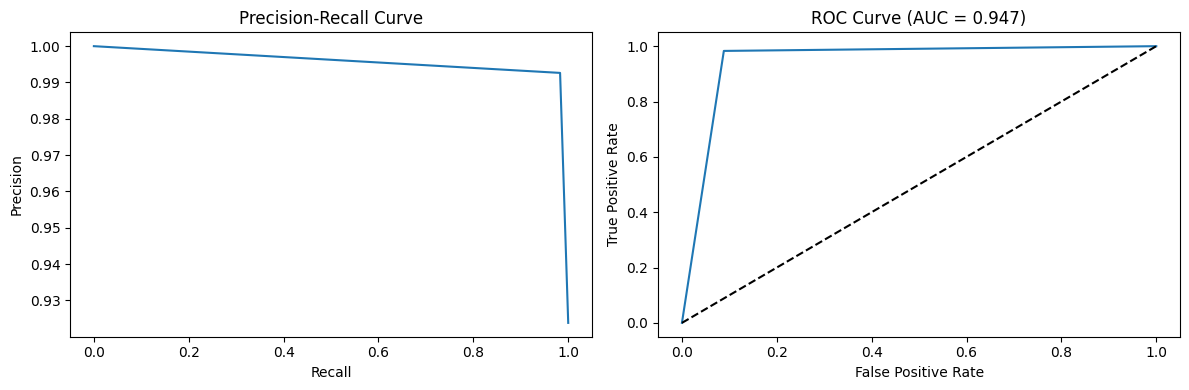

In [155]:
# Create metrics handler for evaluation
metrics = MetricsHandler()

# Get predictions
y_pred = pipe5.predict(X_val_set)
y_prob = pipe5.predict_proba(X_val_set)

# Calculate and display metrics
metrics.calculate_metrics(y_val_set, y_pred, y_prob)
metrics.plot_curves()

In [156]:
# from sklearn.pipeline import Pipeline

# # 1. Initial Preprocessing Pipeline
# pipe1 = Pipeline([
#     ("imputer", BasicImputationHandler(NUM_FEATS, CAT_FEATS, method='mean')),
#     ("outlier_handler", ImputationOutlierHandler(NUM_FEATS, method='median', threshold=1.5))
# ])

# # 2. Feature Engineering Pipeline 
# pipe2 = Pipeline([
#     ("feature_engineering", AdvancedFeatureEngineering(
#         num_feats=NUM_FEATS,
#         cat_feats=CAT_FEATS,
#         n_clusters=3,
#         n_select_features=20
#     ))
# ])

# # 3. Scaling and Encoding Pipeline
# pipe3 = Pipeline([
#     ("scaler", StandardScalerTransformer(NUM_FEATS)),
#     ("encoder", OneHotEncodingTransformer(CAT_FEATS))
# ])

# # 4. Model Pipeline
# pipe4 = Pipeline([
#     ("knn", KNeighborsClassifier(
#         n_neighbors=5,
#         weights='distance',
#         metric='manhattan',
#         n_jobs=-1
#     ))
# ])

# # Combine all pipelines
# full_pipeline = Pipeline([
#     ('preprocessing', pipe1),
#     ('feature_engineering', pipe2),
#     ('scaling_encoding', pipe3),
#     ('model', pipe4)
# ])

# # Apply pipeline to training data
# X_train_transformed = full_pipeline.fit_transform(X_train_set)
# X_val_transformed = full_pipeline.transform(X_val_set)

# # Print shapes to verify
# print("Training set shape:", X_train_transformed.shape)
# print("Validation set shape:", X_val_transformed.shape)

In [157]:
# # Create the pipeline
# pipe1 = Pipeline([
#     ("imputer", FeatureImputer(NUM_FEATS, CAT_FEATS)),
#     ("creator", FeatureCreator(NUM_FEATS))
    
# ])

# # Fit and transform the training set
# train_set = pipe1.fit_transform(train_set)
# val_set = pipe1.transform(val_set)

In [158]:
# # Define the numerical and categorical features
# NUM_FEATS = train.select_dtypes(include=[np.number]).columns.tolist()
# CAT_FEATS = train.select_dtypes(exclude=[np.number]).columns.tolist()

# # Identify boolean features
# BOOL_FEATS = []
# for COL in NUM_FEATS:
#     UNIQUE_VALS = set(train[COL].dropna().unique())
#     if UNIQUE_VALS.issubset({0, 1, 0.0, 1.0, True, False}) and 'NoOf' not in COL and 'label' not in COL:
#         BOOL_FEATS.append(COL)

# # Update NUM_FEATS and CAT_FEATS
# NUM_FEATS = [col for col in NUM_FEATS if col not in BOOL_FEATS]
# CAT_FEATS = CAT_FEATS + BOOL_FEATS

In [159]:
# Export train_set[NUM_FEATS] to a new CSV file
# train_set[NUM_FEATS].to_csv('train_set_features.csv', index=False)

In [160]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Correlations Between Features and the Target Variable
# correlation_matrix = train_set.corr()

# print("1. Correlation with Label:")
# print(correlation_matrix)
# print()

# # Create a heatmap for the correlation with the label
# plt.figure(figsize=(14, 12))  # Increase figure size to accommodate longer feature names
# sns.heatmap(correlation_matrix,
#             annot=False,
#             cmap='coolwarm',
#             fmt='.2f',
#             linewidths=0.5,
#             cbar_kws={'shrink': 0.75, 'label': 'Correlation Coefficient'},
#             square=True,
#             vmin=-1, vmax=1)

# plt.xticks(rotation=90, ha='right', fontsize=8)  # Adjust font size and rotation for x-axis labels
# plt.yticks(rotation=0, ha='right', fontsize=8)   # Adjust font size for y-axis labels
# plt.title('Correlation with Label', fontsize=16, pad=20)

# plt.tight_layout()
# plt.show()
# plt.close()

# # Key Insight: This heatmap focuses on the correlation of features with the target variable,
# # helping to identify which features are most relevant for prediction.

In [161]:
# # Create the pipeline
# pipe2 = Pipeline([
#     ("dropper", FeatureDropper(NUM_FEATS, CAT_FEATS))
    
# ])

# # Fit and transform the training set
# train_set = pipe2.fit_transform(train_set)
# val_set = pipe2.transform(val_set)

In [162]:
# # Define the numerical and categorical features
# NUM_FEATS = train.select_dtypes(include=[np.number]).columns.tolist()
# CAT_FEATS = train.select_dtypes(exclude=[np.number]).columns.tolist()

# # Identify boolean features
# BOOL_FEATS = []
# for COL in NUM_FEATS:
#     UNIQUE_VALS = set(train[COL].dropna().unique())
#     if UNIQUE_VALS.issubset({0, 1, 0.0, 1.0, True, False}) and 'NoOf' not in COL:
#         BOOL_FEATS.append(COL)

# # Update NUM_FEATS and CAT_FEATS
# NUM_FEATS = [col for col in NUM_FEATS if col not in BOOL_FEATS]
# CAT_FEATS = CAT_FEATS + BOOL_FEATS

In [163]:
# # Create the pipeline
# pipe3 = Pipeline([
#     ("scaler", FeatureScaler(NUM_FEATS))
# ])

# # Fit and transform the training set
# train_set = pipe3.fit_transform(train_set)
# val_set = pipe3.transform(val_set)

In [164]:
# from sklearn.neighbors import KNeighborsClassifier
# # Create the pipeline
# pipe4 = Pipeline([
#     ("encoder", FeatureEncoder(CAT_FEATS)),
#     ("downcaster", FeatureDowncaster())
# ])


# # Fit and transform the training set
# train_set = pipe3.fit_transform(train_set)
# val_set = pipe3.transform(val_set)

In [165]:
# from sklearn.neighbors import KNeighborsClassifier
# # Create the pipeline
# pipe5 = Pipeline([
#     ("knn", KNeighborsClassifier())
# ])

or create your own here

In [166]:
# def match_columns(train, test):
#     # Get list of columns in training set
#     train_cols = train.columns.tolist()
    
#     # Get list of columns in test set
#     test_cols = test.columns.tolist()
    
#     # Remove any columns in test set that aren't in training set
#     for col in test_cols:
#         if col not in train_cols:
#             test = test.drop(col, axis=1)
    
#     # Add any missing columns to test set and fill with 0
#     for col in train_cols:
#         if col not in test_cols:
#             test[col] = 0
    
#     # Reorder columns in test set to match training set
#     test = test[train_cols]
    
#     # Return modified test set
#     return test

In [167]:
# val_set = match_columns(train_set, val_set)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [168]:
# from lib.knn import knn
# from sklearn.neighbors import KNeighborsClassifier

# knn_scratch = knn(k=11, metric='manhattan', weights='distance', n_jobs=-1, batch_size=100)
# knn_library = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance', n_jobs=-1)

# knn_scratch.save('lib/knn_model.pkl')

## B. Naive Bayes

In [169]:
# from lib.gnb import gnb
# from sklearn.naive_bayes import GaussianNB

# gnb_scratch = gnb(batch_size=100)
# gnb_library = GaussianNB()

# gnb_scratch.save('lib/gnb_model.pkl')

In [170]:
# # # Ensure indices of X_train_set and y_train_set match
# # # X_train_set, y_train_set = X_train_set.align(y_train_set, axis=0, join='inner')

# # # Fit the classifiers
# clfs = [knn_scratch, gnb_scratch, knn_library, gnb_library]

# for clf in clfs:
#     clf.fit(X_train_set, y_train_set)

In [171]:
# 1. Model Configuration
class ModelConfig:
    """Configurations for different models"""
    def __init__(self):
        # KNN Configuration
        self.knn_scratch_config = {
            'k': 11,
            'metric': 'manhattan',
            'weights': 'distance',
            'n_jobs': -1,
            'batch_size': 100
        }
        self.knn_library_config = {
            'n_neighbors': 5,
            'metric': 'manhattan',
            'weights': 'distance',
            'n_jobs': -1
        }
        # Naive Bayes Configuration
        self.gnb_scratch_config = {
            'batch_size': 100
        }

In [172]:
from lib.knn import knn
from sklearn.neighbors import KNeighborsClassifier
from lib.gnb import gnb
from sklearn.naive_bayes import GaussianNB
# 2. Model Initialization
def initialize_models(config):
    """Initialize all models with configurations"""
    models = {
        'KNN (Scratch)': knn(**config.knn_scratch_config),
        'KNN (Library)': KNeighborsClassifier(**config.knn_library_config),
        'GNB (Scratch)': gnb(**config.gnb_scratch_config),
        'GNB (Library)': GaussianNB()
    }
    return models

In [173]:
# 3. Model Training
def train_models(models, X_train, y_train):
    """Train all models"""
    trained_models = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

In [174]:
# 4. Model Evaluation
def evaluate_models(models, X_train, X_val, y_train, y_val):
    """Evaluate all models"""
    results = {}
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        results[name] = model_evaluation(
            model, X_train, X_val, y_train, y_val, name
        )
    return results

In [175]:
# Usage
def run_modeling_pipeline():
    # Initialize configurations
    config = ModelConfig()
    
    # Initialize models
    models = initialize_models(config)
    
    # Train models
    trained_models = train_models(models, X_train_set, y_train_set)
    
    # Evaluate models
    results = evaluate_models(
        trained_models, 
        X_train_set, X_val_set, 
        y_train_set, y_val_set
    )
    
    # Save best models
    for name, model in trained_models.items():
        if 'Scratch' in name:
            model.save(f'lib/{name.lower().replace(" ", "_")}_model.pkl')
            
    return trained_models, results

In [176]:
# Run pipeline
trained_models, evaluation_results = run_modeling_pipeline()


Training KNN (Scratch)...

Training KNN (Library)...


ValueError: Found input variables with inconsistent numbers of samples: [155958, 84242]

In [214]:
# # Define the parameter grid with the correct prefix
# param_grid = {
#     'knn__n_neighbors': [3, 5, 7, 9, 11],
#     'knn__weights': ['uniform', 'distance'],
#     'knn__metric': ['euclidean', 'manhattan', 'minkowski']
# }

In [215]:
# # Menghtiung null values
# y_train_set.isnull().sum()
# kibikhikuhb

In [216]:
# from sklearn.model_selection import GridSearchCV

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=pipe5,
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1_macro',
#     n_jobs=-1
# )

# # Fit the GridSearchCV object
# grid_search.fit(X_train_set, y_train_set)

# # Get the best estimator and parameters
# best_knn = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best cross-validation score: 0.9438089013922


Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best Score: 0.9438089013922


## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [218]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])

    result = (result * 100).round(5).astype(str) + '%'
    return result

In [219]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name=None):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''

    if model_name is None:
        model_name = clf.__class__.__name__

    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print()
    print(f"\n\t\t {model_name} EVALUATION REPORT")
    print("="*55)
    print("\n\t\t Training Set Performance")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t\t Validation Set Performance")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color(THEME)

    # Plot confusion matrix for test set
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap=CMAP_COLOUR, ax=ax2)
    ax2.set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [220]:
for clf in clfs:
    model_evaluation(clf, X_train_set, X_val_set, y_train_set, y_val_set)

Using 22 cores for predictions.


  0%|          | 0/983 [00:00<?, ?it/s]

  5%|▌         | 52/983 [01:03<18:55,  1.22s/it]


KeyboardInterrupt: 

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [59]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`